In [ ]:
!pip install qamuy-client --extra-index-url https://download.qamuy.qunasys.com/simple/

In [1]:
!qamuy login

In [2]:
import qamuy.chemistry as qy
from qamuy.client import Client

In [3]:
setting = qy.QamuyChemistryInput()

atoms = ["H", "O", "H"]
coords = [
    [0.968877, 0.012358, 0.000000],
    [-0.019830, -0.025588, 0.000000],
    [-0.229801, 0.941311, 0.000000]
]
molecule = setting.target_molecule
molecule.geometry = qy.molecule_geometry(atoms, coords)
molecule.basis = "6-31g"
molecule.multiplicity = 1
molecule.num_excited_states = 0
molecule.cas = qy.cas(2,2)

In [6]:
setting.output_chemical_properties.append(
    qy.output_chemical_property(
        target="dipole_moment", states=[0]
    )
)

setting.post_hf_methods.append(
    qy.PostHFMethod(type="CASCI")
)
setting.mapping.type = "JORDAN_WIGNER"
setting.solver.type = "VQE"

setting.cost_function.type = "SIMPLE"
setting.cost_function.s2_number_weight = 4.0
setting.cost_function.sz_number_weight = 4.0

In [7]:
setting.ansatz.type = "SYMMETRY_PRESERVING"
setting.ansatz.depth = 4
setting.ansatz.use_random_initial_guess = True
setting.optimizer.type = "BFGS"
setting.quantum_device.type = "EXACT_SIMULATOR"

In [8]:
client = Client()
job = client.submit(setting)

In [10]:
result=client.get_job_result(job)
result

{'input': {'solver': {'type': 'VQE', 'orbital_optimization': {'type': 'NONE'}},
  'cost_function': {'type': 'SIMPLE',
   's2_number_weight': 4.0,
   'sz_number_weight': 4.0},
  'ansatz': {'type': 'SYMMETRY_PRESERVING',
   'is_state_real': True,
   'reference_state': 'RHF',
   'use_random_initial_guess': True,
   'randomness_type': 'UNIFORM',
   'depth': 4,
   'init_param_random_seed': 1,
   'spin_adapted_ref_state': False,
   'entanglement_pattern': 'LINEAR',
   'spin_state_list': []},
  'optimizer': {'type': 'BFGS',
   'ftol': 1e-06,
   'gtol': 1e-06,
   'max_iter': 1000,
   'max_fev': 10000,
   'max_run': 10000,
   'differential_type': 'NUMERICAL'},
  'target_molecule': {'geometry': {'atoms': ['H', 'O', 'H'],
    'coordinates': [[0.968877, 0.012358, 0.0],
     [-0.01983, -0.025588, 0.0],
     [-0.229801, 0.941311, 0.0]],
    'geometry_format': 'CARTESIAN'},
   'basis': '6-31g',
   'cas': {'active_ele': 2, 'active_orb': 2, 'cas_list': []},
   'multiplicity': 1,
   'charge': 0,
   'num

In [31]:
results = client.wait_and_get_job_results([job])
output = results[0].output

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished


In [32]:
q_results = output.molecule_result.quantum_device_result
c_results = output.molecule_result.post_hf_results[0]
vqe_log = q_results.vqe_log

In [34]:
c_results

{'evaluated_properties': [{'energy': {'values': [{'value': -75.97992367852632, 'state': 0, 'sample_std': 0.0}], 'metadata': {'elapsed_time': 0.0002853219999678913, 'success': True}}}, {'num_electrons': {'metadata': {'elapsed_time': 1.2801000025319809e-05, 'success': True}, 'values': []}}, {'multiplicity': {'values': [{'value': 1.0, 'state': 0}], 'metadata': {'elapsed_time': 0.00460315600003014, 'success': True}}}, {'sz_number': {'metadata': {'elapsed_time': 1.6501999994034122e-05, 'success': True}, 'values': []}}, {'dipole_moment': {'values': [{'value': [0.6539289622692277, 0.8437997274539667, -4.4668569117973487e-17], 'state': 0, 'sample_std': []}], 'metadata': {'elapsed_time': 0.01564270899996245, 'success': True}}}, {'dipole_moment': {'values': [{'value': [0.6539289622692277, 0.8437997274539667, -4.4668569117973487e-17], 'state': 0, 'sample_std': []}], 'metadata': {'elapsed_time': 0.015336985999965691, 'success': True}}}, {'dipole_moment': {'values': [{'value': [0.6539289622692277, 

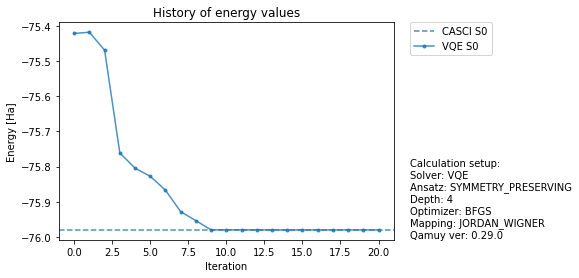

In [36]:
import qamuy.plot
fig, ax = qamuy.plot.plot_energy_history(output, state_label_map={0: "S0"})